# Evaluate model performance

In [1]:
# Load price data
import pandas as pd
prices = pd.read_csv('data/eurusd_minute.csv')['BidClose'].values

In [3]:
# Sample standardized data interval values
from dataset import EncodedForexData
import numpy as np
from tqdm import tqdm

from encoders import SimpleRasterizeEncoder, GasfEncoder, RGGafEncoder

ENCODER = 'rel_simple'

params = {
    'simple': {'encoder':SimpleRasterizeEncoder(), 'channels':1, 'relative':False},
    'rel_simple': {'encoder':SimpleRasterizeEncoder(), 'channels':1, 'relative':True},
    'gasf': {'encoder':GasfEncoder(), 'channels':1, 'relative':False},
}[ENCODER]

dataset = EncodedForexData(prices, 64, encoder=['encoder'], relative=params['relative'])
encoder = params['encoder']


standardize = lambda x: (x-x.mean())/x.std()
decode = lambda x: standardize(encoder.decode(x))

data = np.concatenate([decode(mat) for mat in tqdm(dataset)], axis=0)

100%|██████████| 80690/80690 [00:07<00:00, 11120.27it/s]


In [6]:
from models import Generator
model = Generator(channels=params['channels'])

In [7]:
import matplotlib.pyplot as plt
def plot_cdf(data, ax=None, **kwargs):
    y = 1. * np.arange(len(data)) / (len(data) - 1)
    if ax is None:
        ax = plt.gca()
    ax.plot(np.sort(data), y, **kwargs)

In [11]:
# Compare generated data to original data
from transforms import reverse_rel_raster, reverse_gasf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest

import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


model = model.to(device)
def evaluate(model, decoder, n):
    model.eval()
    sample_batches = []
    with torch.no_grad():
        noise = torch.randn(n,100).to(device)
        for i in range(n//100):
            sample_batches.append(model(noise[i*100:(i+1)*100]))

    samples = []
    for batch in tqdm(sample_batches):
        for mat in batch:
            samples.append(decoder(mat))

    samples = np.stack(samples)
    
    model_data = samples.reshape(-1)

    # for sample in model_samples[:10]:
    #     plt.plot(np.cumsum(sample))
    #     plt.show()

    # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    # plot_cdf(data, ax=ax1, label='Real')
    # plot_cdf(model_data, ax=ax1, label='Generated')
    # ax1.legend()

    # ax2.hist(data, bins=100, density=True, label='Real', alpha=0.5)
    # ax2.hist(model_data, bins=100, density=True, label='Generated', alpha=0.5)
    # ax2.legend()
    # plt.show()
    ks = kstest(data, model_data)
    print('KS test:', ks)
    return ks

In [17]:
dicts = [f'experiments/rel_simple2/model/checkpoints/{i}/g.pt' for i in range(71)]

ks_vals = []
for weights in dicts:
    model.load_state_dict(torch.load(weights))
    ks = evaluate(model, decode, 1000)
    ks_vals.append(ks)

100%|██████████| 10/10 [00:01<00:00,  5.35it/s]


KS test: KstestResult(statistic=0.04643844497459415, pvalue=6.562206148134328e-119)


100%|██████████| 10/10 [00:01<00:00,  5.05it/s]


KS test: KstestResult(statistic=0.04153467359648033, pvalue=3.3639818686851636e-95)


100%|██████████| 10/10 [00:01<00:00,  5.09it/s]


KS test: KstestResult(statistic=0.030806224051927122, pvalue=1.481867155151612e-52)


100%|██████████| 10/10 [00:02<00:00,  4.69it/s]


KS test: KstestResult(statistic=0.020940768682612465, pvalue=1.6367490933687607e-24)


100%|██████████| 10/10 [00:02<00:00,  4.71it/s]


KS test: KstestResult(statistic=0.020032268558681385, pvalue=1.813738551545226e-22)


100%|██████████| 10/10 [00:02<00:00,  4.64it/s]


KS test: KstestResult(statistic=0.016499093753872845, pvalue=2.227960132930963e-15)


100%|██████████| 10/10 [00:02<00:00,  4.69it/s]


KS test: KstestResult(statistic=0.01583404658260007, pvalue=3.3803173263580575e-14)


100%|██████████| 10/10 [00:02<00:00,  4.68it/s]


KS test: KstestResult(statistic=0.014426239698227789, pvalue=7.392291259807014e-12)


100%|██████████| 10/10 [00:02<00:00,  4.70it/s]


KS test: KstestResult(statistic=0.015294628748915517, pvalue=2.826289032161169e-13)


100%|██████████| 10/10 [00:02<00:00,  4.71it/s]


KS test: KstestResult(statistic=0.013870958684471413, pvalue=5.392651451689141e-11)


100%|██████████| 10/10 [00:02<00:00,  4.14it/s]


KS test: KstestResult(statistic=0.01675692271347129, pvalue=7.532891698444402e-16)


100%|██████████| 10/10 [00:01<00:00,  5.05it/s]


KS test: KstestResult(statistic=0.01989632195749158, pvalue=3.6034927277658757e-22)


100%|██████████| 10/10 [00:02<00:00,  4.89it/s]


KS test: KstestResult(statistic=0.01590900553042507, pvalue=2.5018905179595505e-14)


100%|██████████| 10/10 [00:02<00:00,  4.91it/s]


KS test: KstestResult(statistic=0.013501206391746234, pvalue=1.9394980458797572e-10)


100%|██████████| 10/10 [00:01<00:00,  5.02it/s]


KS test: KstestResult(statistic=0.013931094311562697, pvalue=4.364900701474496e-11)


100%|██████████| 10/10 [00:02<00:00,  4.46it/s]


KS test: KstestResult(statistic=0.0111824982184906, pvalue=2.69945860477262e-07)


100%|██████████| 10/10 [00:01<00:00,  5.16it/s]


KS test: KstestResult(statistic=0.01312207793716691, pvalue=6.951503147404383e-10)


100%|██████████| 10/10 [00:02<00:00,  4.90it/s]


KS test: KstestResult(statistic=0.011174890011153904, pvalue=2.7581600431617675e-07)


100%|██████████| 10/10 [00:02<00:00,  4.76it/s]


KS test: KstestResult(statistic=0.014015115720659277, pvalue=3.2434499188933394e-11)


100%|██████████| 10/10 [00:02<00:00,  4.82it/s]


KS test: KstestResult(statistic=0.01483642063762547, pvalue=1.6200218685805425e-12)


100%|██████████| 10/10 [00:02<00:00,  4.72it/s]


KS test: KstestResult(statistic=0.01167133861073244, pvalue=6.571407552113475e-08)


100%|██████████| 10/10 [00:02<00:00,  4.29it/s]


KS test: KstestResult(statistic=0.01183407369252698, pvalue=4.050992361170332e-08)


100%|██████████| 10/10 [00:02<00:00,  4.91it/s]


KS test: KstestResult(statistic=0.010787553057999721, pvalue=8.088416812153093e-07)


100%|██████████| 10/10 [00:02<00:00,  4.80it/s]


KS test: KstestResult(statistic=0.010880451031726301, pvalue=6.270511719628829e-07)


100%|██████████| 10/10 [00:02<00:00,  4.89it/s]


KS test: KstestResult(statistic=0.012014155254678305, pvalue=2.353309448417579e-08)


100%|██████████| 10/10 [00:02<00:00,  4.79it/s]


KS test: KstestResult(statistic=0.015253987095674826, pvalue=3.306800290766888e-13)


100%|██████████| 10/10 [00:02<00:00,  4.97it/s]


KS test: KstestResult(statistic=0.01061040517722145, pvalue=1.3063667735145934e-06)


100%|██████████| 10/10 [00:02<00:00,  4.74it/s]


KS test: KstestResult(statistic=0.016446897462510823, pvalue=2.7692319524052956e-15)


100%|██████████| 10/10 [00:02<00:00,  4.82it/s]


KS test: KstestResult(statistic=0.013201091755483951, pvalue=5.34369077546288e-10)


100%|██████████| 10/10 [00:02<00:00,  4.76it/s]


KS test: KstestResult(statistic=0.014872128284174002, pvalue=1.4166276312744748e-12)


100%|██████████| 10/10 [00:01<00:00,  5.21it/s]


KS test: KstestResult(statistic=0.010807930040897251, pvalue=7.650563915773804e-07)


100%|██████████| 10/10 [00:01<00:00,  5.05it/s]


KS test: KstestResult(statistic=0.011196872289007342, pvalue=2.5918396356037037e-07)


100%|██████████| 10/10 [00:01<00:00,  5.04it/s]


KS test: KstestResult(statistic=0.014192559874209865, pvalue=1.722242169102917e-11)


100%|██████████| 10/10 [00:01<00:00,  5.18it/s]


KS test: KstestResult(statistic=0.011301030564506154, pvalue=1.9270775613501927e-07)


100%|██████████| 10/10 [00:01<00:00,  5.26it/s]


KS test: KstestResult(statistic=0.009305354597843651, pvalue=3.496715799827788e-05)


100%|██████████| 10/10 [00:01<00:00,  5.20it/s]


KS test: KstestResult(statistic=0.00914899615813608, pvalue=5.036772202109821e-05)


100%|██████████| 10/10 [00:02<00:00,  5.00it/s]


KS test: KstestResult(statistic=0.008548009744082263, pvalue=0.00019335007295721797)


100%|██████████| 10/10 [00:01<00:00,  5.00it/s]


KS test: KstestResult(statistic=0.012653293081546724, pvalue=3.2043458608242575e-09)


100%|██████████| 10/10 [00:01<00:00,  5.57it/s]


KS test: KstestResult(statistic=0.009842884418763242, pvalue=9.51290138235547e-06)


100%|██████████| 10/10 [00:01<00:00,  5.20it/s]


KS test: KstestResult(statistic=0.01382269139608383, pvalue=6.385866422521149e-11)


100%|██████████| 10/10 [00:01<00:00,  5.06it/s]


KS test: KstestResult(statistic=0.008946537287767953, pvalue=8.005424810845559e-05)


100%|██████████| 10/10 [00:02<00:00,  3.73it/s]


KS test: KstestResult(statistic=0.009371324668484282, pvalue=2.992158835768091e-05)


100%|██████████| 10/10 [00:01<00:00,  5.19it/s]


KS test: KstestResult(statistic=0.013589726112281597, pvalue=1.4321079403877877e-10)


100%|██████████| 10/10 [00:01<00:00,  5.11it/s]


KS test: KstestResult(statistic=0.012832445160490757, pvalue=1.7987169648133562e-09)


100%|██████████| 10/10 [00:02<00:00,  4.77it/s]


KS test: KstestResult(statistic=0.010864829904573048, pvalue=6.545765293506671e-07)


100%|██████████| 10/10 [00:01<00:00,  5.09it/s]


KS test: KstestResult(statistic=0.01252917802701703, pvalue=4.757820371836042e-09)


100%|██████████| 10/10 [00:01<00:00,  5.02it/s]


KS test: KstestResult(statistic=0.009230271718924266, pvalue=4.169681176284535e-05)


100%|██████████| 10/10 [00:02<00:00,  4.76it/s]


KS test: KstestResult(statistic=0.014533647292105545, pvalue=4.988106595688156e-12)


100%|██████████| 10/10 [00:01<00:00,  5.45it/s]


KS test: KstestResult(statistic=0.008490974330772172, pvalue=0.0002186376380711836)


100%|██████████| 10/10 [00:01<00:00,  5.13it/s]


KS test: KstestResult(statistic=0.009868516854628862, pvalue=8.924036443749453e-06)


100%|██████████| 10/10 [00:02<00:00,  4.95it/s]


KS test: KstestResult(statistic=0.007189415122691778, pvalue=0.0028891894064122714)


100%|██████████| 10/10 [00:01<00:00,  5.08it/s]


KS test: KstestResult(statistic=0.010500520897880783, pvalue=1.7517809979356234e-06)


100%|██████████| 10/10 [00:02<00:00,  4.75it/s]


KS test: KstestResult(statistic=0.009779851902342318, pvalue=1.1123717748848469e-05)


100%|██████████| 10/10 [00:02<00:00,  5.00it/s]


KS test: KstestResult(statistic=0.007273097657702232, pvalue=0.0024791089269600728)


100%|██████████| 10/10 [00:01<00:00,  5.10it/s]


KS test: KstestResult(statistic=0.01164208699962821, pvalue=7.163328793197292e-08)


100%|██████████| 10/10 [00:01<00:00,  5.13it/s]


KS test: KstestResult(statistic=0.00955659584521007, pvalue=1.9202915339945543e-05)


100%|██████████| 10/10 [00:01<00:00,  5.07it/s]


KS test: KstestResult(statistic=0.011949869872351027, pvalue=2.8595189612155025e-08)


100%|██████████| 10/10 [00:02<00:00,  4.92it/s]


KS test: KstestResult(statistic=0.007082718196182891, pvalue=0.003502873305557491)


100%|██████████| 10/10 [00:02<00:00,  4.98it/s]


KS test: KstestResult(statistic=0.00929281044739122, pvalue=3.601427881911269e-05)


100%|██████████| 10/10 [00:01<00:00,  5.09it/s]


KS test: KstestResult(statistic=0.008752306280208233, pvalue=0.00012365374041913528)


100%|██████████| 10/10 [00:02<00:00,  4.93it/s]


KS test: KstestResult(statistic=0.011643459923782351, pvalue=7.134424851808428e-08)


100%|██████████| 10/10 [00:01<00:00,  5.06it/s]


KS test: KstestResult(statistic=0.011890119593506054, pvalue=3.42397584422872e-08)


100%|██████████| 10/10 [00:01<00:00,  5.09it/s]


KS test: KstestResult(statistic=0.012698068998636791, pvalue=2.7758285558403036e-09)


100%|██████████| 10/10 [00:01<00:00,  5.10it/s]


KS test: KstestResult(statistic=0.009336680118354201, pvalue=3.247764335483016e-05)


100%|██████████| 10/10 [00:01<00:00,  5.02it/s]


KS test: KstestResult(statistic=0.006435931497087544, pvalue=0.010585998083075695)


100%|██████████| 10/10 [00:02<00:00,  5.00it/s]


KS test: KstestResult(statistic=0.009167622614326465, pvalue=4.824058617195141e-05)


100%|██████████| 10/10 [00:02<00:00,  4.90it/s]


KS test: KstestResult(statistic=0.00751690691225676, pvalue=0.0015711592864078045)


100%|██████████| 10/10 [00:02<00:00,  4.58it/s]


KS test: KstestResult(statistic=0.011287341987854749, pvalue=2.003928641646347e-07)


100%|██████████| 10/10 [00:01<00:00,  5.44it/s]


KS test: KstestResult(statistic=0.006012396982277846, pvalue=0.020623295272909365)


100%|██████████| 10/10 [00:02<00:00,  4.85it/s]


KS test: KstestResult(statistic=0.010466941380592343, pvalue=1.9149254888162753e-06)


100%|██████████| 10/10 [00:02<00:00,  4.97it/s]


KS test: KstestResult(statistic=0.006378896083777452, pvalue=0.011611338311939334)


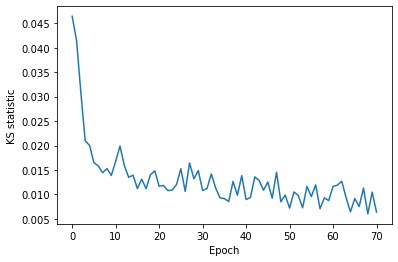

In [19]:
vals = np.array([ks.statistic for ks in ks_vals])
plt.plot(vals)
plt.xlabel('Epoch')
plt.ylabel('KS statistic')
np.save('experiment_results/ks_relsimple.npy', vals)